In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams["figure.figsize"] = (18,10)

In [2]:
!gdown 1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J

Downloading...
From: https://drive.google.com/uc?id=1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J
To: /content/mnist_train.csv
100% 76.8M/76.8M [00:01<00:00, 51.0MB/s]


In [3]:
d0 = pd.read_csv('mnist_train.csv')

d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
d0.shape

(42000, 785)

In [ ]:
# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

In [ ]:
# d.iloc[0].values.reshape(28, 28)

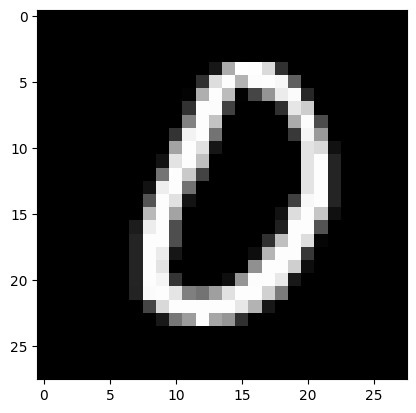

In [ ]:
plt.imshow(d.iloc[502].values.reshape(28, 28), cmap="gray")
plt.show()

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
print(X.shape)

(1797, 64)


In [ ]:
X[10].reshape(8,8)

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

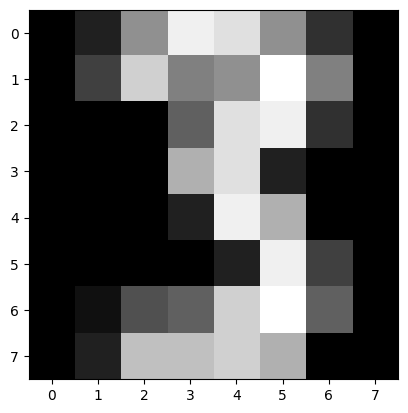

In [ ]:
plt.imshow(X[13].reshape(8,8), cmap="gray")
plt.show()

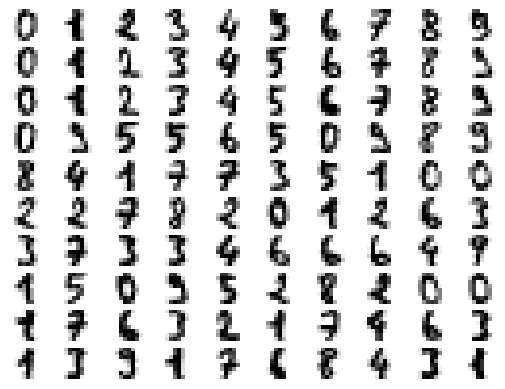

In [ ]:
import matplotlib.pyplot as plt

plt.set_cmap('binary') # set the colourmap to grayscale white to black

for i in range(10):
  for j in range(10):
   ax = plt.subplot(10,10,1+10*i+j)
   ax.axis('off')
   ax.matshow(digits.images[10*i+j])

plt.show()
plt.close()

In [ ]:
X.shape

(1797, 64)

In [ ]:
X[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_stand = scaler.transform(X)
X_stand.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # To reduce to 2 components

X_embedded = pca.fit_transform(X)

X_embedded.shape

(1797, 2)

In [ ]:
X_embedded[:5]

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       [-15.90610526,  -3.33246429],
       [ 23.30686741,  -4.26906083]])

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)

<Figure size 1800x1000 with 0 Axes>

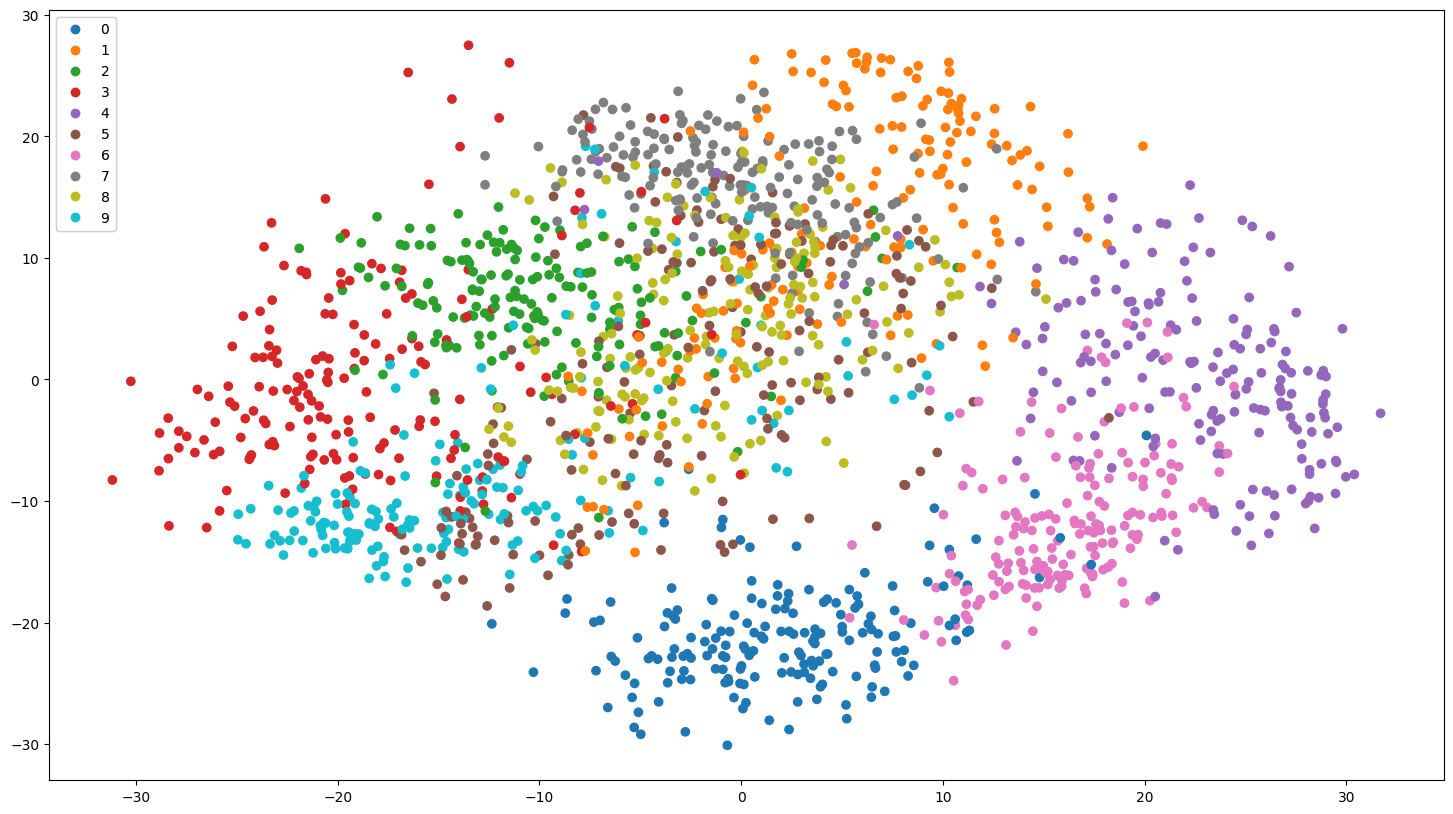

In [ ]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [ ]:
pca.explained_variance_ratio_.sum()

np.float64(0.28509364823699285)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA() # it will create d=64 many PC's
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.149, 0.136, 0.118, 0.084, 0.058, 0.049, 0.043, 0.037, 0.034,
       0.031, 0.024, 0.023, 0.018, 0.018, 0.015, 0.014, 0.013, 0.012,
       0.01 , 0.009, 0.009, 0.008, 0.008, 0.007, 0.007, 0.006, 0.006,
       0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [ ]:
pca.explained_variance_ratio_.cumsum().round(3)

array([0.149, 0.285, 0.403, 0.487, 0.545, 0.594, 0.637, 0.674, 0.707,
       0.738, 0.762, 0.785, 0.803, 0.821, 0.835, 0.849, 0.863, 0.875,
       0.885, 0.894, 0.903, 0.911, 0.919, 0.926, 0.933, 0.939, 0.945,
       0.95 , 0.955, 0.959, 0.963, 0.966, 0.97 , 0.973, 0.976, 0.979,
       0.982, 0.984, 0.986, 0.988, 0.99 , 0.992, 0.993, 0.995, 0.996,
       0.997, 0.998, 0.999, 0.999, 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [ ]:
# with 28 features.
# 95% info is preserved

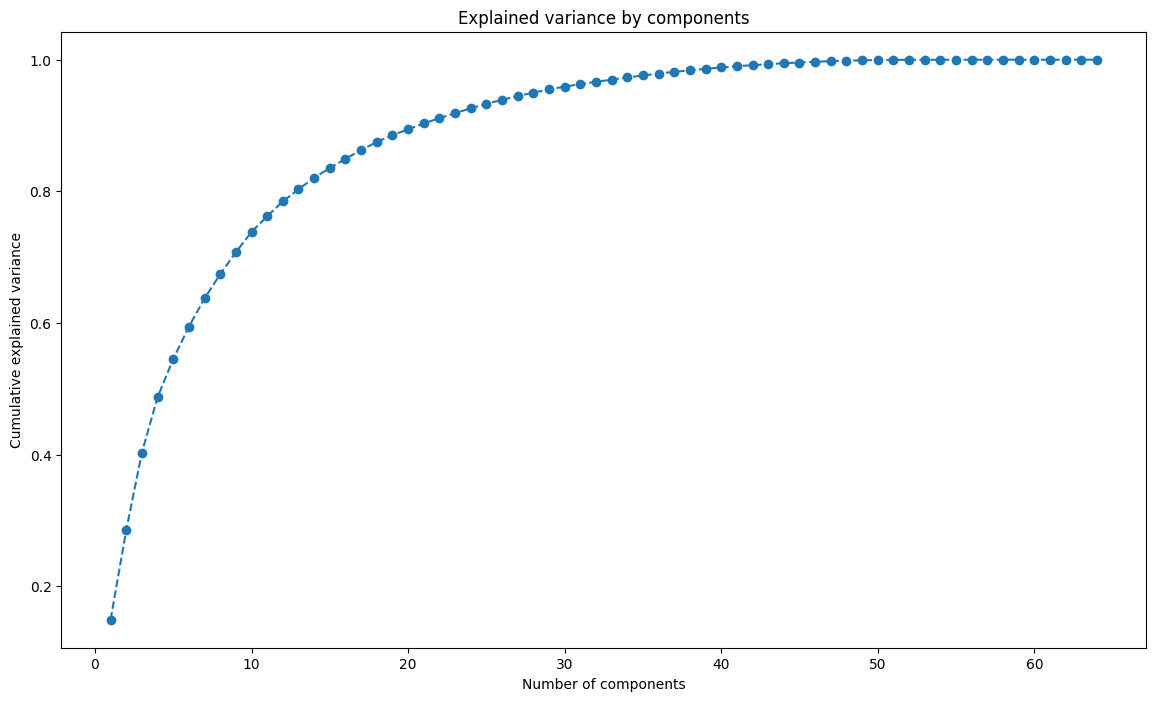

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(range(1, 65), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
plt.close()

# PCA from scratch

In [ ]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 3.18MB/s]


In [ ]:
data = pd.read_csv('/content/pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


In [ ]:
data.shape

(20, 2)

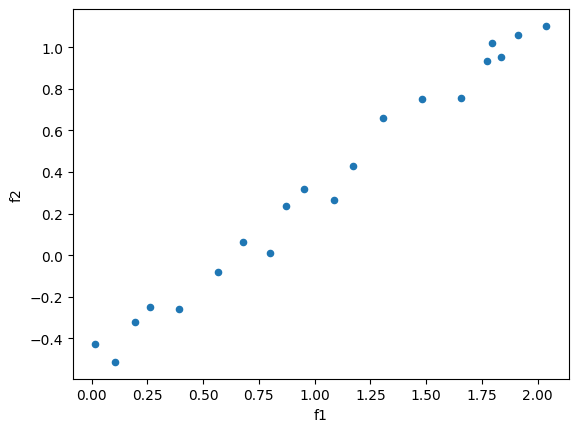

In [ ]:
data.plot(x='f1', y='f2', kind='scatter')
plt.show()

In [ ]:
X = data.values
X.shape

(20, 2)

In [ ]:
# Step1:
X_new = (X - X.mean(axis= 0))/ X.std(axis=0)
X_new.shape

(20, 2)

In [ ]:
X_new[:5]

array([[ 1.54535131,  1.45245914],
       [-0.27203872, -0.18355391],
       [ 1.16782713,  1.29657192],
       [-1.46270299, -1.60570434],
       [ 0.6761373 ,  0.78638828]])

In [ ]:
# Step-2

In [ ]:
n = len(X)
V = np.dot(X.T, X)/n
V

array([[1.50500658, 0.68742205],
       [0.68742205, 0.39163271]])

In [ ]:
# Step-3 eigen value decomposition

In [ ]:
eigenValues, eigenVectors = np.linalg.eig(V, )

In [ ]:
eigenValues

array([1.83288136, 0.06375793])

In [ ]:
eigenValues/eigenValues.sum()

array([0.96638373, 0.03361627])

In [ ]:
eigenVectors

array([[ 0.90258974, -0.43050177],
       [ 0.43050177,  0.90258974]])

In [ ]:
new_d = 1
PCs = eigenVectors[:, :new_d].reshape(-1, new_d)
PCs.shape

(2, 1)

In [ ]:
X_new.shape

(20, 2)

In [ ]:
# Step4-Projection
X_prime = X_new.dot(PCs)
X_prime

array([[ 2.02010445],
       [-0.32455963],
       [ 1.61224528],
       [-2.01147926],
       [ 0.94881613],
       [ 1.80961785],
       [-1.72934653],
       [ 1.50712462],
       [ 1.19914593],
       [-0.73758306],
       [ 0.00477451],
       [ 0.25252046],
       [ 0.63058407],
       [-1.00796509],
       [-0.14243425],
       [-1.39913865],
       [-2.06349355],
       [ 1.61449026],
       [-1.57612062],
       [-0.60730291]])

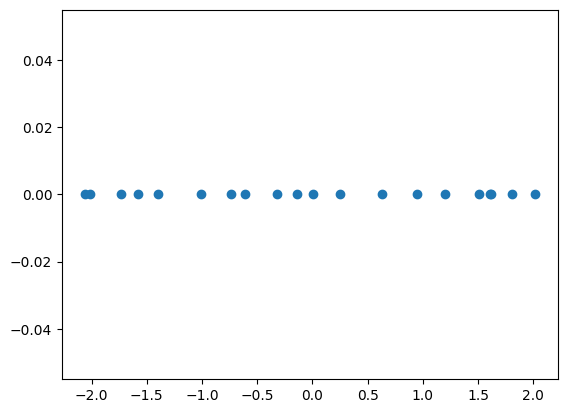

In [ ]:
plt.scatter(X_prime, np.zeros((len(X),)))

# t-SNE



In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

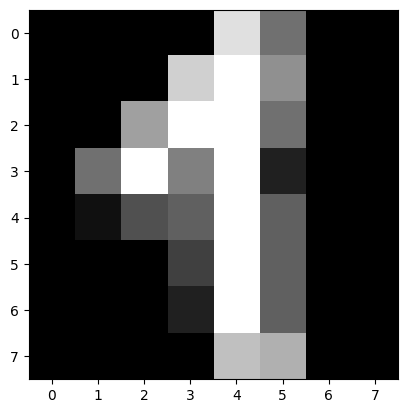

In [5]:
plt.imshow(X[70].reshape(8, 8), cmap = 'gray');

In [6]:
X.shape

(1797, 64)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components = 2, perplexity=25,  random_state= 0)
Z = tsne.fit_transform(X)

In [ ]:
Z.shape

(1797, 2)

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,10)
cmap = ListedColormap(sns.husl_palette(len(np.unique(y))))

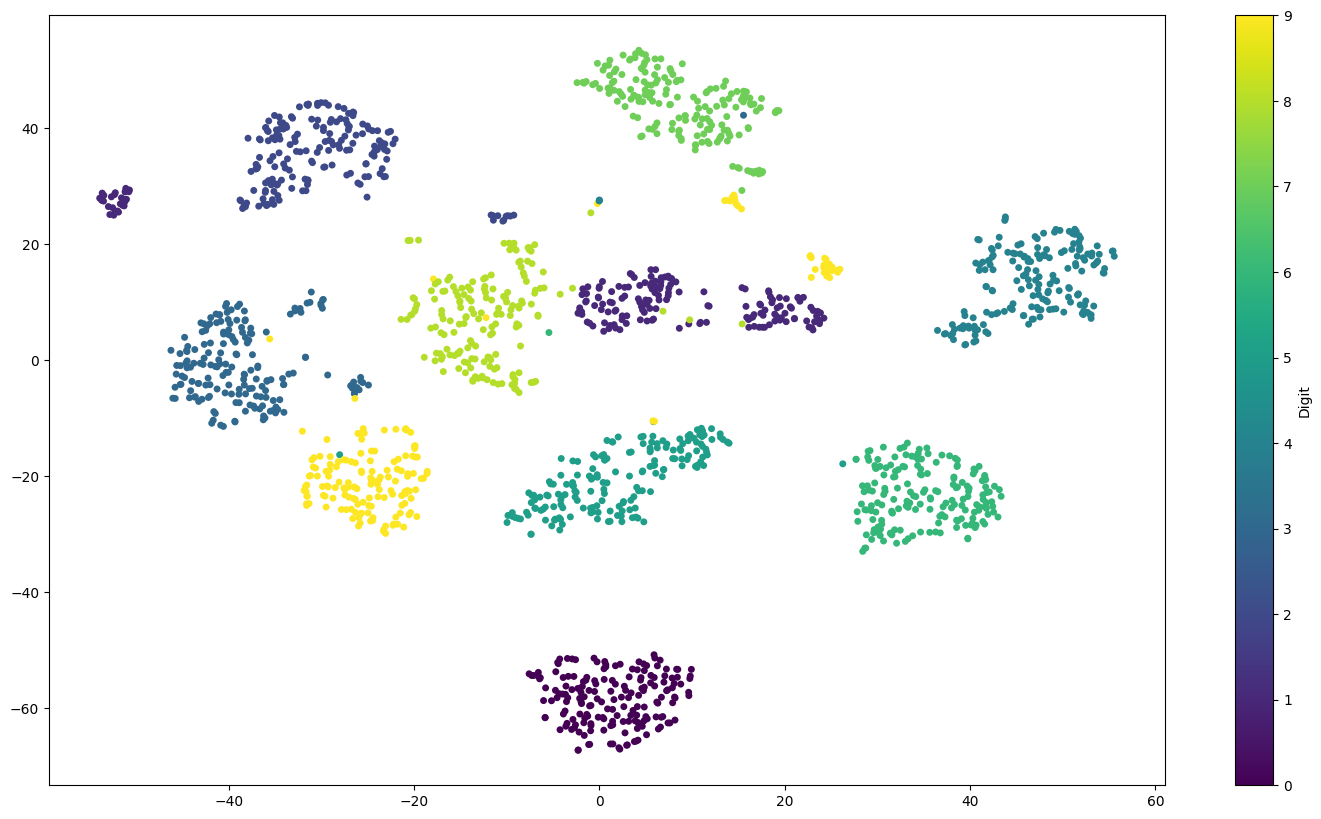

In [ ]:
fig, ax = plt.subplots()


im = ax.scatter(Z[:,0], Z[:,1], s=25, c=y, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

# UMAP

In [2]:
!pip install umap-learn

In [3]:
from umap import UMAP

In [6]:
model = UMAP(n_components = 2, n_neighbors = 22 )
Z = model.fit_transform(X)

In [7]:
Z.shape

(1797, 2)

In [9]:
from matplotlib.colors import ListedColormap
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,10)
cmap = ListedColormap(sns.husl_palette(len(np.unique(y))))

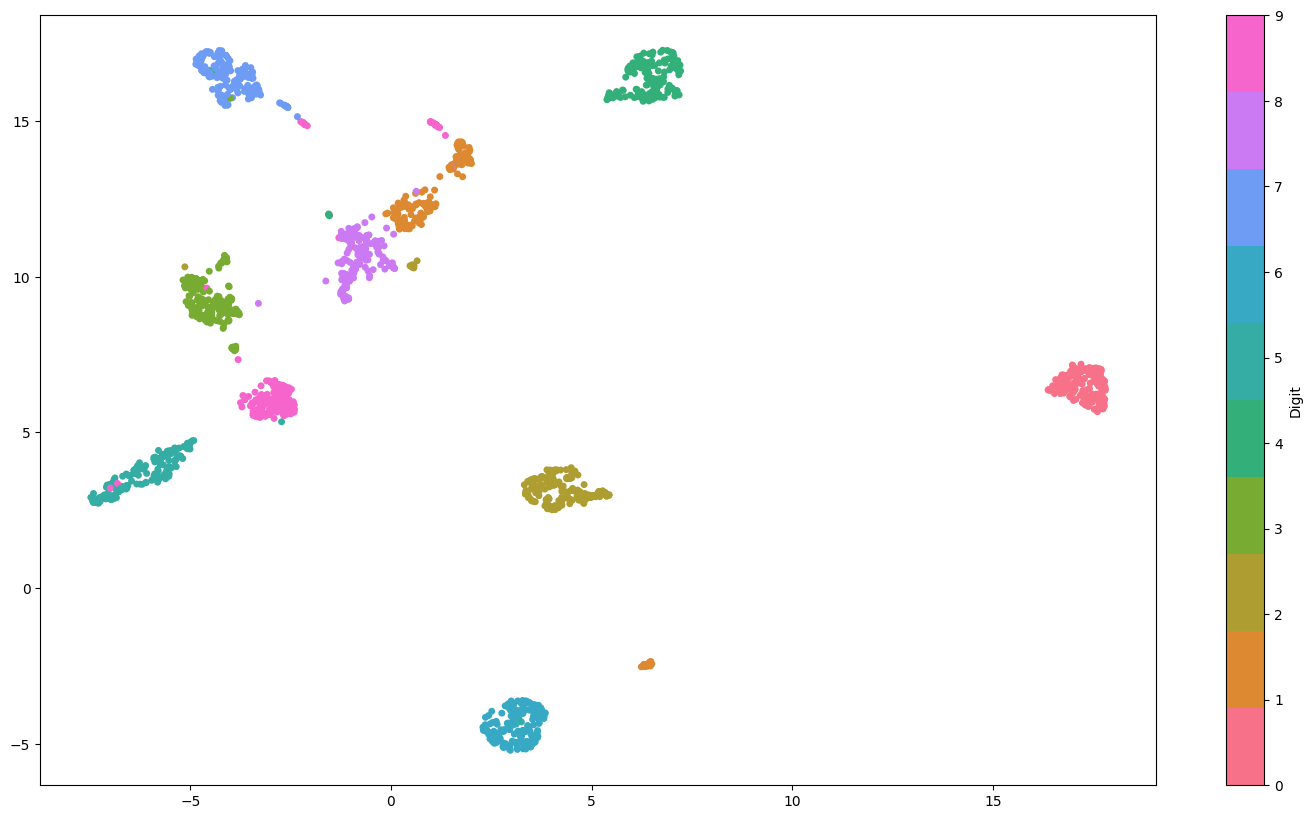

In [10]:
fig, ax = plt.subplots()


im = ax.scatter(Z[:,0], Z[:,1], s=25, c=y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')